# Upbit 가격 데이터를 이용한 코인가격 예측

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests

import json

import time
import datetime
from datetime import timedelta

import os

## Upbit 상장 목록 가져오기

In [2]:
cc_url = "https://api.upbit.com/v1/market/all?isDetails=true"

cc_headers = {"Accept": "application/json"}

cc_response = requests.request("GET", cc_url, headers=cc_headers)

In [3]:
cc_list = pd.read_json(cc_response.text)
cc_list['code'] = cc_list.market.apply(lambda x : x.split('-')[1])
cc_list['method'] = cc_list.market.apply(lambda x : x.split('-')[0])

In [4]:
kr_market_cc = cc_list[cc_list.method == 'KRW']

In [5]:
kr_market_cc

,market_warning,market,korean_name,english_name,code,method
0,NONE,KRW-BTC,비트코인,Bitcoin,BTC,KRW
1,NONE,KRW-ETH,이더리움,Ethereum,ETH,KRW
32,NONE,KRW-NEO,네오,NEO,NEO,KRW
33,NONE,KRW-MTL,메탈,Metal,MTL,KRW
34,NONE,KRW-LTC,라이트코인,Litecoin,LTC,KRW
...,...,...,...,...,...,...
256,NONE,KRW-MATIC,폴리곤,Polygon,MATIC,KRW
258,NONE,KRW-NU,누사이퍼,Nucypher,NU,KRW
260,NONE,KRW-AAVE,에이브,Aave,AAVE,KRW
261,NONE,KRW-1INCH,1인치네트워크,1inch Network,1INCH,KRW


## Upbit 시세 가져오기

In [6]:
prev_day = timedelta(days=201)

In [7]:
dates = []
for i in range(0, 9) :
    dates.append(pd.to_datetime('2021-11-10 00:00:00') - prev_day * i)

In [8]:
dates

[Timestamp('2021-11-10 00:00:00'),
 Timestamp('2021-04-23 00:00:00'),
 Timestamp('2020-10-04 00:00:00'),
 Timestamp('2020-03-17 00:00:00'),
 Timestamp('2019-08-29 00:00:00'),
 Timestamp('2019-02-09 00:00:00'),
 Timestamp('2018-07-23 00:00:00'),
 Timestamp('2018-01-03 00:00:00'),
 Timestamp('2017-06-16 00:00:00')]

In [77]:
url = "https://api.upbit.com/v1/candles/days?"

headers = {"Accept": "application/json"}

for data in kr_market_cc.iloc :

    for date in dates :
        params = {
            "market" : data['market'],
            "to" : str(date),
            "count" : 200,
        }
        
        try : 
            response = requests.request("GET", url, headers=headers, params=params)

            if response.status_code == 200 :
                temp_df = pd.read_json(response.text)
                temp_df.to_csv('./data/{}_{}.csv'.format(data['english_name'], str(date)[:10]))
                print(data['english_name'], str(date)[:10], 'save complete')

            else :
                print('response 400', data['english_name'], str(date)[:10])

        except Exception as e:
            print(e)
            
        time.sleep(2)

KRW-BTC 2021-11-10 00:00:00
Bitcoin 2021-11-10 save complete
KRW-BTC 2021-04-24 00:00:00
Bitcoin 2021-04-24 save complete
KRW-BTC 2020-10-06 00:00:00
Bitcoin 2020-10-06 save complete
KRW-BTC 2020-03-20 00:00:00
Bitcoin 2020-03-20 save complete
KRW-BTC 2019-09-02 00:00:00
Bitcoin 2019-09-02 save complete
KRW-BTC 2019-02-14 00:00:00
Bitcoin 2019-02-14 save complete
KRW-BTC 2018-07-29 00:00:00
Bitcoin 2018-07-29 save complete
KRW-BTC 2018-01-10 00:00:00
Bitcoin 2018-01-10 save complete
KRW-BTC 2017-06-24 00:00:00
Bitcoin 2017-06-24 save complete
KRW-ETH 2021-11-10 00:00:00
Ethereum 2021-11-10 save complete
KRW-ETH 2021-04-24 00:00:00
Ethereum 2021-04-24 save complete
KRW-ETH 2020-10-06 00:00:00
Ethereum 2020-10-06 save complete
KRW-ETH 2020-03-20 00:00:00
Ethereum 2020-03-20 save complete
KRW-ETH 2019-09-02 00:00:00
Ethereum 2019-09-02 save complete
KRW-ETH 2019-02-14 00:00:00
Ethereum 2019-02-14 save complete
KRW-ETH 2018-07-29 00:00:00
Ethereum 2018-07-29 save complete
KRW-ETH 2018-01-1

KRW-XLM 2017-06-24 00:00:00
Lumen 2017-06-24 save complete
KRW-ARDR 2021-11-10 00:00:00
Ardor 2021-11-10 save complete
KRW-ARDR 2021-04-24 00:00:00
Ardor 2021-04-24 save complete
KRW-ARDR 2020-10-06 00:00:00
Ardor 2020-10-06 save complete
KRW-ARDR 2020-03-20 00:00:00
Ardor 2020-03-20 save complete
KRW-ARDR 2019-09-02 00:00:00
Ardor 2019-09-02 save complete
KRW-ARDR 2019-02-14 00:00:00
Ardor 2019-02-14 save complete
KRW-ARDR 2018-07-29 00:00:00
Ardor 2018-07-29 save complete
KRW-ARDR 2018-01-10 00:00:00
Ardor 2018-01-10 save complete
KRW-ARDR 2017-06-24 00:00:00
Ardor 2017-06-24 save complete
KRW-ARK 2021-11-10 00:00:00
Ark 2021-11-10 save complete
KRW-ARK 2021-04-24 00:00:00
Ark 2021-04-24 save complete
KRW-ARK 2020-10-06 00:00:00
Ark 2020-10-06 save complete
KRW-ARK 2020-03-20 00:00:00
Ark 2020-03-20 save complete
KRW-ARK 2019-09-02 00:00:00
Ark 2019-09-02 save complete
KRW-ARK 2019-02-14 00:00:00
Ark 2019-02-14 save complete
KRW-ARK 2018-07-29 00:00:00
Ark 2018-07-29 save complete
KR

KRW-ZIL 2017-06-24 00:00:00
Zilliqa 2017-06-24 save complete
KRW-POLY 2021-11-10 00:00:00
Polymath 2021-11-10 save complete
KRW-POLY 2021-04-24 00:00:00
Polymath 2021-04-24 save complete
KRW-POLY 2020-10-06 00:00:00
Polymath 2020-10-06 save complete
KRW-POLY 2020-03-20 00:00:00
Polymath 2020-03-20 save complete
KRW-POLY 2019-09-02 00:00:00
Polymath 2019-09-02 save complete
KRW-POLY 2019-02-14 00:00:00
Polymath 2019-02-14 save complete
KRW-POLY 2018-07-29 00:00:00
Polymath 2018-07-29 save complete
KRW-POLY 2018-01-10 00:00:00
Polymath 2018-01-10 save complete
KRW-POLY 2017-06-24 00:00:00
Polymath 2017-06-24 save complete
KRW-ZRX 2021-11-10 00:00:00
0x Protocol 2021-11-10 save complete
KRW-ZRX 2021-04-24 00:00:00
0x Protocol 2021-04-24 save complete
KRW-ZRX 2020-10-06 00:00:00
0x Protocol 2020-10-06 save complete
KRW-ZRX 2020-03-20 00:00:00
0x Protocol 2020-03-20 save complete
KRW-ZRX 2019-09-02 00:00:00
0x Protocol 2019-09-02 save complete
KRW-ZRX 2019-02-14 00:00:00
0x Protocol 2019-02

KRW-ELF 2020-03-20 00:00:00
aelf 2020-03-20 save complete
KRW-ELF 2019-09-02 00:00:00
aelf 2019-09-02 save complete
KRW-ELF 2019-02-14 00:00:00
aelf 2019-02-14 save complete
KRW-ELF 2018-07-29 00:00:00
aelf 2018-07-29 save complete
KRW-ELF 2018-01-10 00:00:00
aelf 2018-01-10 save complete
KRW-ELF 2017-06-24 00:00:00
aelf 2017-06-24 save complete
KRW-KNC 2021-11-10 00:00:00
Kyber Network 2021-11-10 save complete
KRW-KNC 2021-04-24 00:00:00
Kyber Network 2021-04-24 save complete
KRW-KNC 2020-10-06 00:00:00
Kyber Network 2020-10-06 save complete
KRW-KNC 2020-03-20 00:00:00
Kyber Network 2020-03-20 save complete
KRW-KNC 2019-09-02 00:00:00
Kyber Network 2019-09-02 save complete
KRW-KNC 2019-02-14 00:00:00
Kyber Network 2019-02-14 save complete
KRW-KNC 2018-07-29 00:00:00
Kyber Network 2018-07-29 save complete
KRW-KNC 2018-01-10 00:00:00
Kyber Network 2018-01-10 save complete
KRW-KNC 2017-06-24 00:00:00
Kyber Network 2017-06-24 save complete
KRW-BSV 2021-11-10 00:00:00
Bitcoin SV 2021-11-10

KRW-CRE 2018-07-29 00:00:00
Carry Protocol 2018-07-29 save complete
KRW-CRE 2018-01-10 00:00:00
Carry Protocol 2018-01-10 save complete
KRW-CRE 2017-06-24 00:00:00
Carry Protocol 2017-06-24 save complete
KRW-MBL 2021-11-10 00:00:00
MovieBloc 2021-11-10 save complete
KRW-MBL 2021-04-24 00:00:00
MovieBloc 2021-04-24 save complete
KRW-MBL 2020-10-06 00:00:00
MovieBloc 2020-10-06 save complete
KRW-MBL 2020-03-20 00:00:00
MovieBloc 2020-03-20 save complete
KRW-MBL 2019-09-02 00:00:00
MovieBloc 2019-09-02 save complete
KRW-MBL 2019-02-14 00:00:00
MovieBloc 2019-02-14 save complete
KRW-MBL 2018-07-29 00:00:00
MovieBloc 2018-07-29 save complete
KRW-MBL 2018-01-10 00:00:00
MovieBloc 2018-01-10 save complete
KRW-MBL 2017-06-24 00:00:00
MovieBloc 2017-06-24 save complete
KRW-WAXP 2021-11-10 00:00:00
WAX 2021-11-10 save complete
KRW-WAXP 2021-04-24 00:00:00
WAX 2021-04-24 save complete
KRW-WAXP 2020-10-06 00:00:00
WAX 2020-10-06 save complete
KRW-WAXP 2020-03-20 00:00:00
WAX 2020-03-20 save comple

KRW-LINK 2020-03-20 00:00:00
Chainlink 2020-03-20 save complete
KRW-LINK 2019-09-02 00:00:00
Chainlink 2019-09-02 save complete
KRW-LINK 2019-02-14 00:00:00
Chainlink 2019-02-14 save complete
KRW-LINK 2018-07-29 00:00:00
Chainlink 2018-07-29 save complete
KRW-LINK 2018-01-10 00:00:00
Chainlink 2018-01-10 save complete
KRW-LINK 2017-06-24 00:00:00
Chainlink 2017-06-24 save complete
KRW-XTZ 2021-11-10 00:00:00
Tezos 2021-11-10 save complete
KRW-XTZ 2021-04-24 00:00:00
Tezos 2021-04-24 save complete
KRW-XTZ 2020-10-06 00:00:00
Tezos 2020-10-06 save complete
KRW-XTZ 2020-03-20 00:00:00
Tezos 2020-03-20 save complete
KRW-XTZ 2019-09-02 00:00:00
Tezos 2019-09-02 save complete
KRW-XTZ 2019-02-14 00:00:00
Tezos 2019-02-14 save complete
KRW-XTZ 2018-07-29 00:00:00
Tezos 2018-07-29 save complete
KRW-XTZ 2018-01-10 00:00:00
Tezos 2018-01-10 save complete
KRW-XTZ 2017-06-24 00:00:00
Tezos 2017-06-24 save complete
KRW-BORA 2021-11-10 00:00:00
BORA 2021-11-10 save complete
KRW-BORA 2021-04-24 00:00:

KRW-SSX 2020-10-06 00:00:00
SOMESING 2020-10-06 save complete
KRW-SSX 2020-03-20 00:00:00
SOMESING 2020-03-20 save complete
KRW-SSX 2019-09-02 00:00:00
SOMESING 2019-09-02 save complete
KRW-SSX 2019-02-14 00:00:00
SOMESING 2019-02-14 save complete
KRW-SSX 2018-07-29 00:00:00
SOMESING 2018-07-29 save complete
KRW-SSX 2018-01-10 00:00:00
SOMESING 2018-01-10 save complete
KRW-SSX 2017-06-24 00:00:00
SOMESING 2017-06-24 save complete
KRW-META 2021-11-10 00:00:00
Metadium 2021-11-10 save complete
KRW-META 2021-04-24 00:00:00
Metadium 2021-04-24 save complete
KRW-META 2020-10-06 00:00:00
Metadium 2020-10-06 save complete
KRW-META 2020-03-20 00:00:00
Metadium 2020-03-20 save complete
KRW-META 2019-09-02 00:00:00
Metadium 2019-09-02 save complete
KRW-META 2019-02-14 00:00:00
Metadium 2019-02-14 save complete
KRW-META 2018-07-29 00:00:00
Metadium 2018-07-29 save complete
KRW-META 2018-01-10 00:00:00
Metadium 2018-01-10 save complete
KRW-META 2017-06-24 00:00:00
Metadium 2017-06-24 save complete

KRW-SOL 2018-07-29 00:00:00
Solana 2018-07-29 save complete
KRW-SOL 2018-01-10 00:00:00
Solana 2018-01-10 save complete
KRW-SOL 2017-06-24 00:00:00
Solana 2017-06-24 save complete
KRW-MATIC 2021-11-10 00:00:00
Polygon 2021-11-10 save complete
KRW-MATIC 2021-04-24 00:00:00
Polygon 2021-04-24 save complete
KRW-MATIC 2020-10-06 00:00:00
Polygon 2020-10-06 save complete
KRW-MATIC 2020-03-20 00:00:00
Polygon 2020-03-20 save complete
KRW-MATIC 2019-09-02 00:00:00
Polygon 2019-09-02 save complete
KRW-MATIC 2019-02-14 00:00:00
Polygon 2019-02-14 save complete
KRW-MATIC 2018-07-29 00:00:00
Polygon 2018-07-29 save complete
KRW-MATIC 2018-01-10 00:00:00
Polygon 2018-01-10 save complete
KRW-MATIC 2017-06-24 00:00:00
Polygon 2017-06-24 save complete
KRW-NU 2021-11-10 00:00:00
Nucypher 2021-11-10 save complete
KRW-NU 2021-04-24 00:00:00
Nucypher 2021-04-24 save complete
KRW-NU 2020-10-06 00:00:00
Nucypher 2020-10-06 save complete
KRW-NU 2020-03-20 00:00:00
Nucypher 2020-03-20 save complete
KRW-NU 20

In [12]:
kr_market_cc

,market_warning,market,korean_name,english_name,code,method
0,NONE,KRW-BTC,비트코인,Bitcoin,BTC,KRW
1,NONE,KRW-ETH,이더리움,Ethereum,ETH,KRW
32,NONE,KRW-NEO,네오,NEO,NEO,KRW
33,NONE,KRW-MTL,메탈,Metal,MTL,KRW
34,NONE,KRW-LTC,라이트코인,Litecoin,LTC,KRW
...,...,...,...,...,...,...
256,NONE,KRW-MATIC,폴리곤,Polygon,MATIC,KRW
258,NONE,KRW-NU,누사이퍼,Nucypher,NU,KRW
260,NONE,KRW-AAVE,에이브,Aave,AAVE,KRW
261,NONE,KRW-1INCH,1인치네트워크,1inch Network,1INCH,KRW


In [17]:
url = "https://api.upbit.com/v1/candles/days?"

headers = {"Accept": "application/json"}

for data in kr_market_cc.iloc :

    params = {
        "market" : data['market'],
        "to" : '2021-12-13 09:00:00',
        "count" : 30,
    }

    try : 
        response = requests.request("GET", url, headers=headers, params=params)

        if response.status_code == 200 :
            temp_df = pd.read_json(response.text)
            temp_df.to_csv('./testing/{}.csv'.format(data['english_name']))
            print(data['english_name'], 'save complete')

        else :
            print('response 400', data['english_name'])

    except Exception as e:
        print(e)

    time.sleep(2)

Bitcoin save complete
Ethereum save complete
NEO save complete
Metal save complete
Litecoin save complete
Ripple save complete
Ethereum Classic save complete
OmiseGo save complete
Status Network Token save complete
Waves save complete
NEM save complete
Qtum save complete
Lisk save complete
Steem save complete
Lumen save complete
Ardor save complete
Ark save complete
Storj save complete
Groestlcoin save complete
Augur save complete
Ada save complete
SteemDollars save complete
Power ledger save complete
Bitcoin Gold save complete
Icon save complete
EOS save complete
TRON save complete
Siacoin save complete
Ontology save complete
Zilliqa save complete
Polymath save complete
0x Protocol save complete
Loom Network save complete
Bitcoin Cash save complete
Basic Attention Token save complete
IOST save complete
Refereum save complete
Civic save complete
Everipedia save complete
IOTA save complete
Mainframe save complete
ONG save complete
GAS save complete
Sentinel Protocol save complete
aelf s

## 가상화폐 시세 목록 합치기

In [83]:
path = './data/'
dir_list = os.listdir(path)

In [98]:
concat_df = []
count = 0
for dir_path in dir_list :
    try :
        concat_df.append(pd.read_csv(path + dir_path, encoding='utf-8', index_col=0))
    except :
        count += 1
        print(dir_path)
        pass
print('error:',count)

.DS_Store
error: 1


In [99]:
cc_df = pd.concat(concat_df)

In [108]:
# cc_df.to_csv('./upbit_daily.csv')

In [112]:
code_list = cc_df.market.unique()

In [127]:
concat_series = []
for code in code_list :
    temp_df = cc_df[cc_df.market == code]
    concat_series.append(pd.Series(temp_df['trade_price'].values, index=temp_df['candle_date_time_kst'], name=code).sort_index())

In [138]:
temp_df = concat_series[0]

for i in range(1, len(concat_series)):
    temp_df = pd.merge(temp_df, concat_series[i], left_index=True, right_index=True, how='outer')

In [140]:
# temp_df.to_csv('./upbit_daily_merged.csv')

In [145]:
temp_df

,KRW-ZIL,KRW-MTL,KRW-STX,KRW-ELF,KRW-SXP,KRW-MANA,KRW-TT,KRW-LSK,KRW-STRAX,KRW-STMX,...,KRW-DOGE,KRW-DAWN,KRW-HUM,KRW-CBK,KRW-SSX,KRW-MATIC,KRW-SAND,KRW-FCT2,KRW-FLOW,KRW-NU
candle_date_time_kst,,,,,,,,,,,,,,,,,,,,,
2017-09-25T09:00:00,NaN,9800.0,NaN,NaN,NaN,NaN,NaN,6750.0,4650.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-26T09:00:00,NaN,9970.0,NaN,NaN,NaN,NaN,NaN,6760.0,4870.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-27T09:00:00,NaN,10450.0,NaN,NaN,NaN,NaN,NaN,6980.0,5280.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-28T09:00:00,NaN,9980.0,NaN,NaN,NaN,NaN,NaN,6510.0,5230.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-29T09:00:00,NaN,9520.0,NaN,NaN,NaN,NaN,NaN,6330.0,4990.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05T09:00:00,133.0,4165.0,2425.0,707.0,3005.0,3150.0,16.1,5005.0,2595.0,40.3,...,318.0,4170.0,296.0,5690.0,87.1,2310.0,3115.0,224.0,16880.0,1115.0
2021-11-06T09:00:00,130.0,4075.0,2435.0,706.0,2940.0,3415.0,15.9,4990.0,2625.0,39.9,...,317.0,4175.0,293.0,5515.0,86.7,2290.0,3275.0,224.0,16770.0,1130.0
2021-11-07T09:00:00,132.0,4060.0,2715.0,707.0,2920.0,3420.0,16.4,4920.0,2610.0,39.3,...,322.0,4160.0,301.0,5750.0,86.7,2285.0,3255.0,223.0,16710.0,1115.0


In [224]:
temp_df['KRW-SAND'].notna().sum()

293

In [205]:
rich_columns = temp_df.notna().sum()[temp_df.notna().sum() > 800].index
len(rich_columns)

66

In [206]:
rich_df = temp_df[rich_columns].dropna()
rich_df

,KRW-ZIL,KRW-MTL,KRW-ELF,KRW-MANA,KRW-TT,KRW-LSK,KRW-STRAX,KRW-STMX,KRW-LTC,KRW-CRE,...,KRW-OMG,KRW-AERGO,KRW-EOS,KRW-BTC,KRW-MED,KRW-ARK,KRW-THETA,KRW-ATOM,KRW-XEM,KRW-MBL
candle_date_time_kst,,,,,,,,,,,,,,,,,,,,,
2019-06-20T09:00:00,25.5,722.0,225.0,67.5,23.0,2410.0,1115.0,3.75,161450.0,45.5,...,2415.0,203.0,8125.0,11349000.0,9.05,625.0,153.0,7755.0,102.0,6.65
2019-06-21T09:00:00,23.6,699.0,232.0,66.0,22.2,2480.0,1090.0,3.62,163450.0,42.0,...,2425.0,194.0,8310.0,11994000.0,8.59,600.0,148.0,7670.0,104.0,5.87
2019-06-22T09:00:00,23.8,701.0,241.0,64.1,21.0,2430.0,1125.0,3.59,164350.0,38.0,...,2610.0,189.0,8650.0,12398000.0,8.35,604.0,153.0,7805.0,107.0,4.81
2019-06-23T09:00:00,23.8,710.0,247.0,62.7,20.6,2445.0,1125.0,3.59,160000.0,36.5,...,2615.0,189.0,8465.0,12681000.0,8.36,597.0,151.0,7960.0,107.0,4.59
2019-06-24T09:00:00,23.8,747.0,246.0,63.2,20.7,2445.0,1135.0,3.62,158500.0,38.4,...,2750.0,195.0,8465.0,12891000.0,8.41,615.0,154.0,7760.0,108.0,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05T09:00:00,133.0,4165.0,707.0,3150.0,16.1,5005.0,2595.0,40.30,242000.0,15.3,...,20880.0,396.0,5475.0,74121000.0,88.40,2420.0,9215.0,44810.0,264.0,12.60
2021-11-06T09:00:00,130.0,4075.0,706.0,3415.0,15.9,4990.0,2625.0,39.90,239700.0,15.0,...,20260.0,397.0,5395.0,74575000.0,88.20,2400.0,9270.0,43920.0,273.0,12.70
2021-11-07T09:00:00,132.0,4060.0,707.0,3420.0,16.4,4920.0,2610.0,39.30,244700.0,14.7,...,19920.0,393.0,5570.0,76536000.0,88.50,2415.0,9025.0,43300.0,260.0,12.70


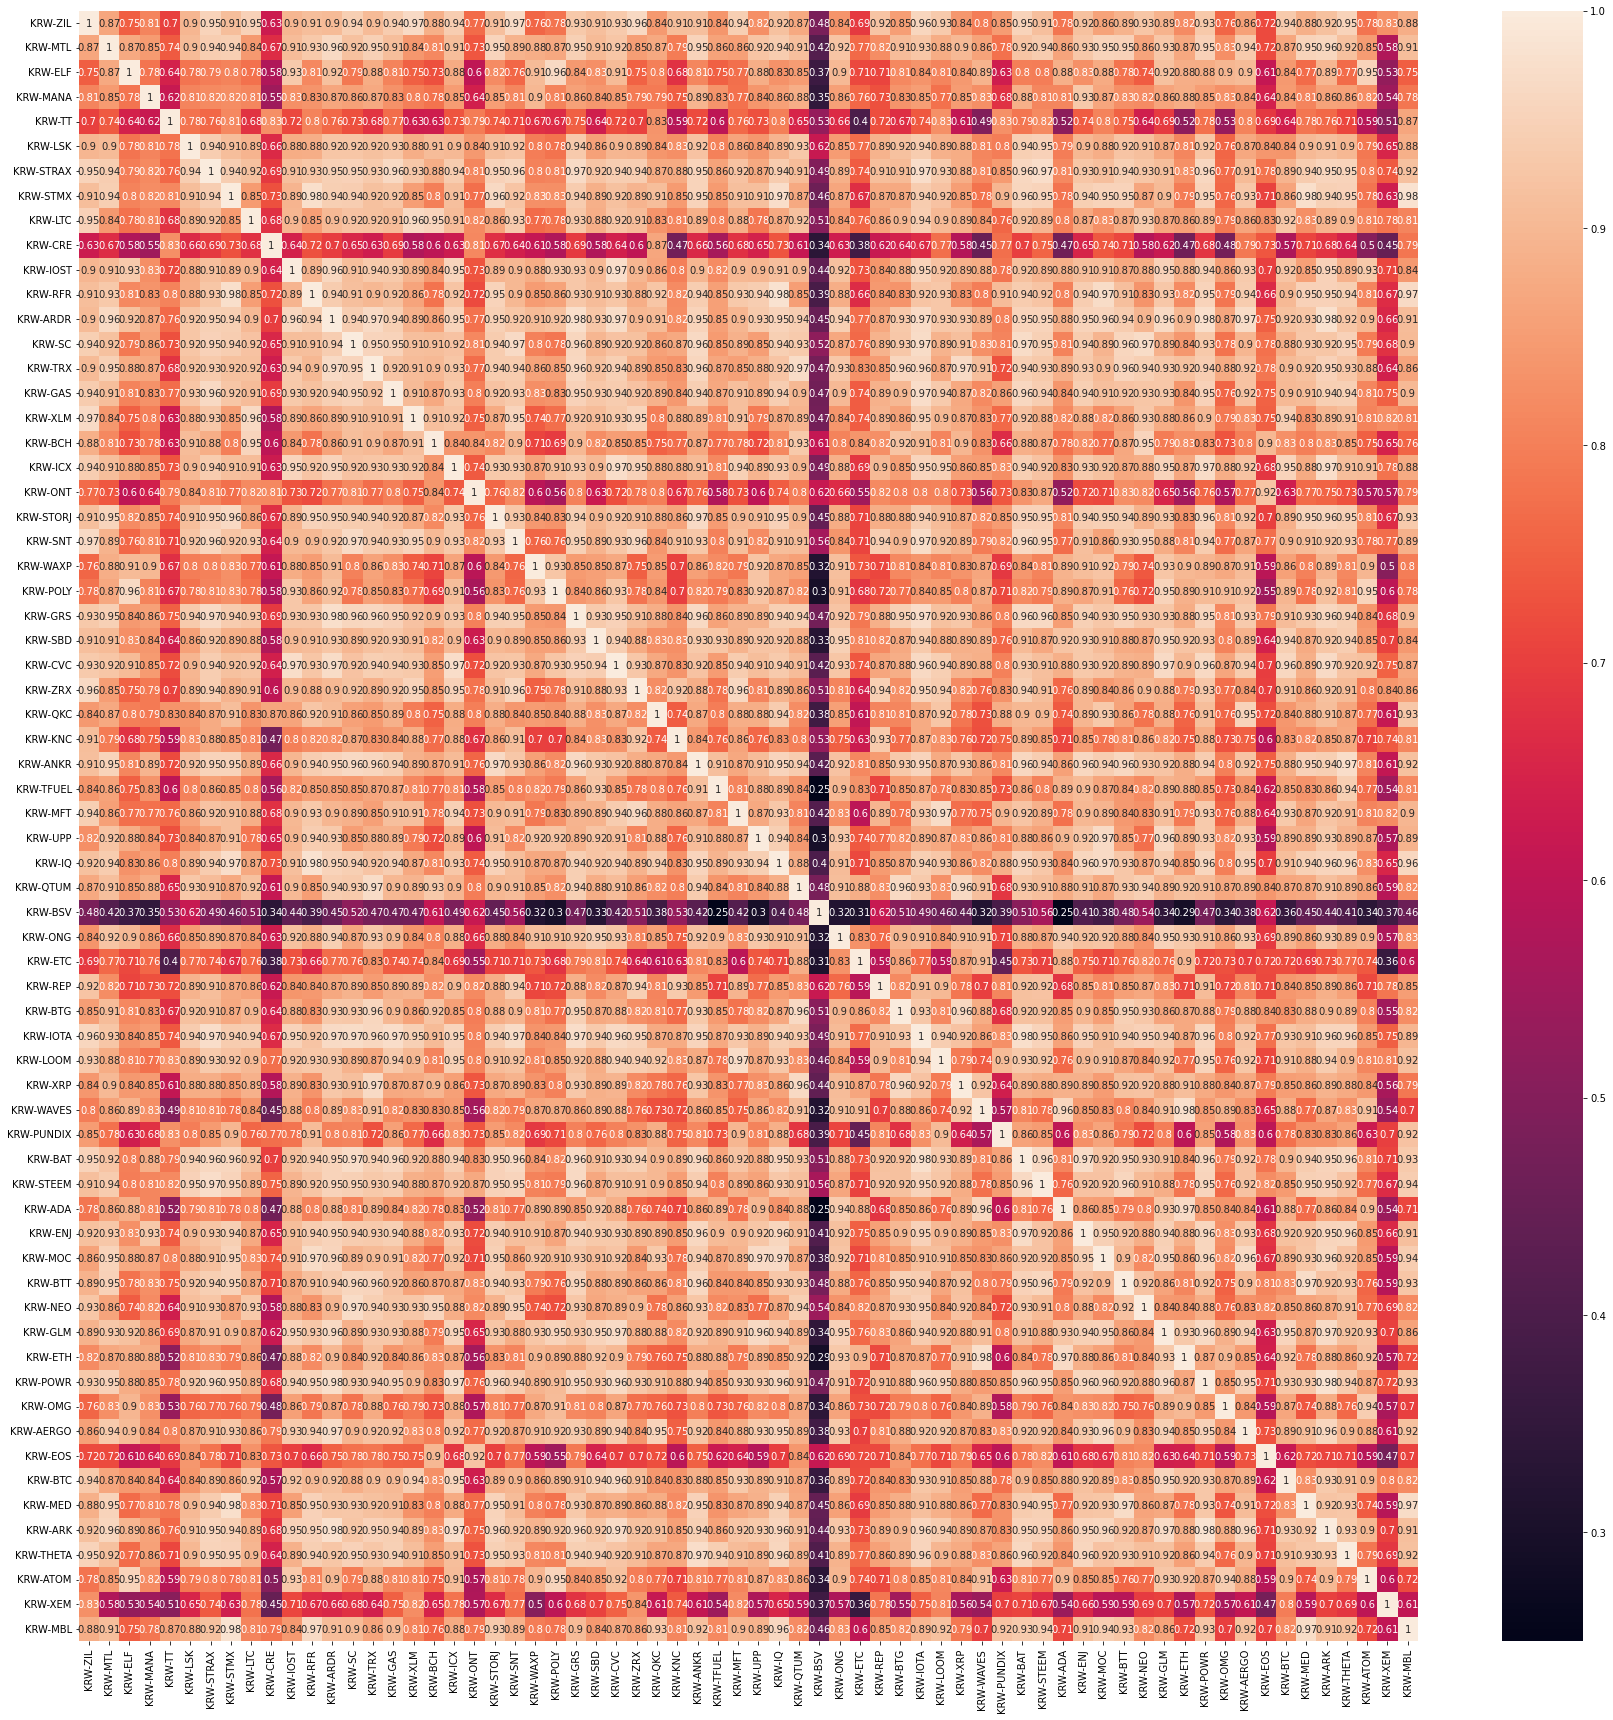

In [220]:
plt.figure(figsize=(30,30))
sns.heatmap(rich_df.corr(),annot=True)
plt.show()

In [259]:
rich_df.pct_change().dropna().T

candle_date_time_kst,2019-06-21T09:00:00,2019-06-22T09:00:00,2019-06-23T09:00:00,2019-06-24T09:00:00,2019-06-25T09:00:00,2019-06-26T09:00:00,2019-06-27T09:00:00,2019-06-28T09:00:00,2019-06-29T09:00:00,2019-06-30T09:00:00,...,2021-10-31T09:00:00,2021-11-01T09:00:00,2021-11-02T09:00:00,2021-11-03T09:00:00,2021-11-04T09:00:00,2021-11-05T09:00:00,2021-11-06T09:00:00,2021-11-07T09:00:00,2021-11-08T09:00:00,2021-11-09T09:00:00
KRW-ZIL,-0.074510,0.008475,0.000000,0.000000,0.008403,-0.045833,-0.109170,0.024510,0.043062,-0.050459,...,0.090909,0.015152,0.007463,-0.029630,0.000000,0.015267,-0.022556,0.015385,0.022727,0.007407
KRW-MTL,-0.031856,0.002861,0.012839,0.052113,0.009371,-0.058355,-0.073239,0.024316,0.002967,-0.045858,...,0.029004,0.011029,-0.004848,-0.021924,0.034869,0.002407,-0.021609,-0.003681,-0.009852,0.034826
KRW-ELF,0.031111,0.038793,0.024896,-0.004049,0.138211,-0.071429,-0.111538,0.043290,0.012448,0.008197,...,0.019034,0.070402,-0.006711,-0.048649,0.012784,-0.008415,-0.001414,0.001416,-0.007072,-0.007123
KRW-MANA,-0.022222,-0.028788,-0.021841,0.007974,-0.026899,-0.011382,-0.065789,0.021127,0.056897,0.013051,...,-0.199058,0.058824,0.012500,-0.067215,-0.114706,0.046512,0.084127,0.001464,-0.051170,-0.052388
KRW-TT,-0.034783,-0.054054,-0.019048,0.004854,0.000000,-0.086957,-0.089947,0.104651,0.036842,-0.030457,...,0.025316,-0.024691,0.006329,0.006289,0.000000,0.006250,-0.012422,0.031447,-0.006098,-0.024540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KRW-ARK,-0.040000,0.006667,-0.011589,0.030151,-0.021138,-0.038206,-0.058722,0.025688,0.021467,-0.028021,...,0.000000,-0.028747,0.019027,-0.018672,0.029598,-0.006160,-0.008264,0.006250,-0.008282,-0.020877
KRW-THETA,-0.032680,0.033784,-0.013072,0.019868,0.051948,-0.049383,-0.064935,0.000000,0.020833,-0.020408,...,-0.123520,0.022901,0.025832,-0.013990,0.055619,-0.009140,0.005969,-0.026429,0.051524,0.004215
KRW-ATOM,-0.010961,0.017601,0.019859,-0.025126,0.001933,-0.011576,-0.106051,0.059680,0.019231,-0.082210,...,-0.007222,0.010230,-0.018452,0.047685,-0.012254,-0.007311,-0.019862,-0.014117,0.020323,-0.023087
KRW-XEM,0.019608,0.028846,0.000000,0.009346,0.018519,0.100000,-0.082645,0.081081,0.000000,-0.050000,...,0.027273,0.022124,0.099567,-0.023622,-0.028226,0.095436,0.034091,-0.047619,-0.050000,0.004049


In [260]:
rich_df.pct_change().dropna()

,KRW-ZIL,KRW-MTL,KRW-ELF,KRW-MANA,KRW-TT,KRW-LSK,KRW-STRAX,KRW-STMX,KRW-LTC,KRW-CRE,...,KRW-OMG,KRW-AERGO,KRW-EOS,KRW-BTC,KRW-MED,KRW-ARK,KRW-THETA,KRW-ATOM,KRW-XEM,KRW-MBL
candle_date_time_kst,,,,,,,,,,,,,,,,,,,,,
2019-06-21T09:00:00,-0.074510,-0.031856,0.031111,-0.022222,-0.034783,0.029046,-0.022422,-0.034667,0.012388,-0.076923,...,0.004141,-0.044335,0.022769,0.056833,-0.050829,-0.040000,-0.032680,-0.010961,0.019608,-0.117293
2019-06-22T09:00:00,0.008475,0.002861,0.038793,-0.028788,-0.054054,-0.020161,0.032110,-0.008287,0.005506,-0.095238,...,0.076289,-0.025773,0.040915,0.033684,-0.027939,0.006667,0.033784,0.017601,0.028846,-0.180579
2019-06-23T09:00:00,0.000000,0.012839,0.024896,-0.021841,-0.019048,0.006173,0.000000,0.000000,-0.026468,-0.039474,...,0.001916,0.000000,-0.021387,0.022826,0.001198,-0.011589,-0.013072,0.019859,0.000000,-0.045738
2019-06-24T09:00:00,0.000000,0.052113,-0.004049,0.007974,0.004854,0.000000,0.008889,0.008357,-0.009375,0.052055,...,0.051625,0.031746,0.000000,0.016560,0.005981,0.030151,0.019868,-0.025126,0.009346,0.089325
2019-06-25T09:00:00,0.008403,0.009371,0.138211,-0.026899,0.000000,0.018405,0.035242,0.063536,0.016404,-0.039062,...,0.149091,0.035897,0.000591,0.081452,0.002378,-0.021138,0.051948,0.001933,0.018519,-0.018000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-05T09:00:00,0.015267,0.002407,-0.008415,0.046512,0.006250,0.027721,-0.003839,0.017677,-0.008197,0.062500,...,-0.098056,-0.014925,0.000000,0.004254,-0.005624,-0.006160,-0.009140,-0.007311,0.095436,0.000000
2021-11-06T09:00:00,-0.022556,-0.021609,-0.001414,0.084127,-0.012422,-0.002997,0.011561,-0.009926,-0.009504,-0.019608,...,-0.029693,0.002525,-0.014612,0.006125,-0.002262,-0.008264,0.005969,-0.019862,0.034091,0.007937
2021-11-07T09:00:00,0.015385,-0.003681,0.001416,0.001464,0.031447,-0.014028,-0.005714,-0.015038,0.020859,-0.020000,...,-0.016782,-0.010076,0.032437,0.026296,0.003401,0.006250,-0.026429,-0.014117,-0.047619,0.000000


## LSTM 단순 적용
- 단순 가격데이터 모델로 예측이 가능한지 확인

In [293]:
df_array = np.array(rich_df.pct_change().dropna())

In [294]:
WINDOWS_SIZE=10
X = []
y = []
for i in range(len(df_array) - WINDOWS_SIZE) :
    X.append([df_array[i + j] for j in range(WINDOWS_SIZE)])
    y.append(df_array[i + WINDOWS_SIZE])

In [295]:
X = np.array(X)
y = np.array(y)

In [296]:
X.shape, y.shape

((863, 10, 66), (863, 66))

In [297]:
TEST_SIZE = 700

X_train = X[:TEST_SIZE]
X_test = X[TEST_SIZE:]

y_train = y[:TEST_SIZE]
y_test = y[TEST_SIZE:]

In [306]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models

In [312]:
activation = tf.nn.leaky_relu

model = models.Sequential()

model.add(layers.LSTM(128, input_shape=(10, 66)))
model.add(layers.Dense(32, activation=activation))
model.add(layers.Dense(66))

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128)               99840     
_________________________________________________________________
dense_12 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_13 (Dense)             (None, 66)                2178      
Total params: 106,146
Trainable params: 106,146
Non-trainable params: 0
_________________________________________________________________


In [313]:
model.compile(optimizer='adam', loss='mse')

In [323]:
model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=1)

Epoch 1/300
560/560 [==============================] - 4s 7ms/step - loss: 7.7717e-04 - val_loss: 0.0218
Epoch 2/300
560/560 [==============================] - 4s 7ms/step - loss: 7.5040e-04 - val_loss: 0.0220
Epoch 3/300
560/560 [==============================] - 4s 7ms/step - loss: 7.6291e-04 - val_loss: 0.0216
Epoch 4/300
560/560 [==============================] - 4s 7ms/step - loss: 7.7126e-04 - val_loss: 0.0227
Epoch 5/300
560/560 [==============================] - 4s 7ms/step - loss: 7.8322e-04 - val_loss: 0.0218
Epoch 6/300
560/560 [==============================] - 4s 7ms/step - loss: 7.6972e-04 - val_loss: 0.0223
Epoch 7/300
560/560 [==============================] - 4s 7ms/step - loss: 7.5826e-04 - val_loss: 0.0221
Epoch 8/300
560/560 [==============================] - 4s 7ms/step - loss: 7.6202e-04 - val_loss: 0.0214
Epoch 9/300
560/560 [==============================] - 4s 7ms/step - loss: 7.5652e-04 - val_loss: 0.0230
Epoch 10/300
560/560 [==============================] -

Epoch 155/300
560/560 [==============================] - 4s 7ms/step - loss: 7.0884e-04 - val_loss: 0.0237
Epoch 156/300
560/560 [==============================] - 4s 7ms/step - loss: 7.0721e-04 - val_loss: 0.0237
Epoch 157/300
560/560 [==============================] - 4s 7ms/step - loss: 7.2021e-04 - val_loss: 0.0243
Epoch 158/300
560/560 [==============================] - 4s 7ms/step - loss: 7.0971e-04 - val_loss: 0.0232
Epoch 159/300
560/560 [==============================] - 4s 8ms/step - loss: 7.1491e-04 - val_loss: 0.0247
Epoch 160/300
560/560 [==============================] - 5s 9ms/step - loss: 7.0338e-04 - val_loss: 0.0238
Epoch 161/300
560/560 [==============================] - 5s 8ms/step - loss: 7.0283e-04 - val_loss: 0.0242
Epoch 162/300
560/560 [==============================] - 5s 8ms/step - loss: 7.1461e-04 - val_loss: 0.0247
Epoch 163/300
560/560 [==============================] - 4s 8ms/step - loss: 7.0680e-04 - val_loss: 0.0244
Epoch 164/300
560/560 [==============

In [320]:
preds = model.predict(X_train)

2021-12-01 16:01:01.625579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-01 16:01:01.644581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [321]:
from sklearn.metrics import r2_score

In [322]:
r2_score(preds, y_train)

-0.6424170144074239